<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Assignment_18_Forecasting_(Airlines%2BData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACF and PACF**

# **Import Libraries**

In [1]:
# ACF and PACF
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# **Load Data Set**

In [2]:
data = pd.read_excel('/content/Airlines+Data.xlsx',index_col='Month',parse_dates=True)

# **EDA**

In [3]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


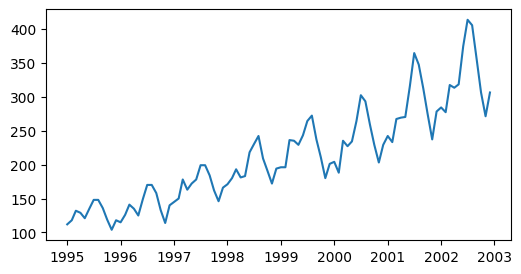

In [4]:
plt.figure(figsize=(6,3))
plt.plot(data)

# **First-order diffrence**

In [5]:
data['Passengers_Diff'] = data['Passengers'].diff(periods=1)

In [6]:
data

,Passengers,Passengers_Diff
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


## **Remove null values**

In [7]:
data = data.dropna()
data

,Passengers,Passengers_Diff
Month,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


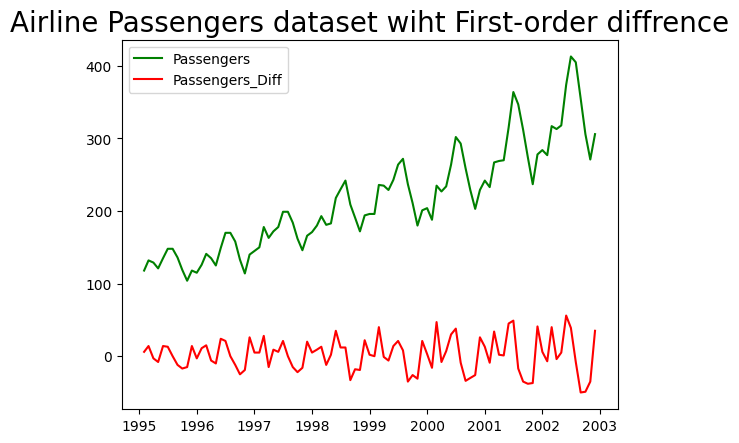

In [8]:
plt.title('Airline Passengers dataset wiht First-order diffrence',size=20)
plt.plot(data['Passengers'],label='Passengers',color='green')
plt.plot(data['Passengers_Diff'],label='Passengers_Diff',color='red')
plt.legend()

# **Calculate Autocorrelation**

### **ACF - Auto correlation function**

In [9]:
acf = acf(data['Passengers_Diff'])
np.round(acf,2)

array([ 1.  ,  0.25, -0.16, -0.19, -0.3 , -0.08,  0.05, -0.11, -0.29,
       -0.13, -0.14,  0.23,  0.77,  0.2 , -0.15, -0.14, -0.23, -0.03,
        0.01, -0.09])

## **ACF Plot**

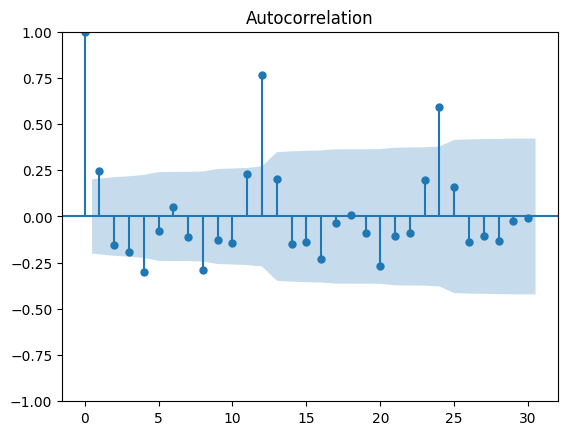

In [10]:
plot_acf(data['Passengers_Diff'],lags=30);

# **Calculate PACF**
Partial Auto Correlation Function

In [11]:
pacf = pacf(data['Passengers_Diff'])
np.round(pacf,2)

array([ 1.  ,  0.25, -0.24, -0.1 , -0.3 ,  0.02, -0.08, -0.25, -0.45,
       -0.22, -0.65, -0.37,  0.59, -0.12, -0.28,  0.26,  0.  , -0.1 ,
       -0.29,  0.39])

# **Plot PACF**

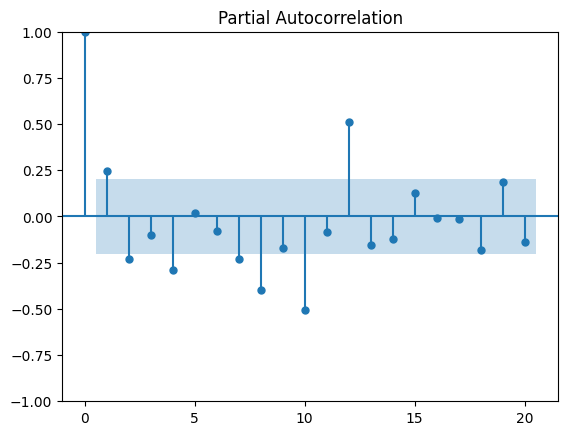

In [12]:
plot_pacf(data['Passengers_Diff']);

# **Model Based Methods**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_excel('/content/Airlines+Data.xlsx')

## Renaming the Month column into Date

In [15]:
data.rename({'Month':'Date'}, axis=1, inplace=True)

# **Data Pre-processing**

In [16]:

data.reset_index(inplace=True)

data["Date"]  = pd.to_datetime(data.Date, format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"]  = data.Date.dt.strftime("%Y") # year extraction

data['t'] = np.arange(1,len(data)+1)
data['t_squared'] = np.square(data.t)
months = pd.get_dummies(data['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
data = pd.concat([data,months],axis=1)
data['log_passengers'] = np.log(data['Passengers'])
data

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,1995-01-01,112,Jan,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,Feb,1995,2,4,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,Mar,1995,3,9,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,3,1995-04-01,129,Apr,1995,4,16,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,May,1995,5,25,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,2002-08-01,405,Aug,2002,92,8464,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,92,2002-09-01,355,Sep,2002,93,8649,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,93,2002-10-01,306,Oct,2002,94,8836,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,94,2002-11-01,271,Nov,2002,95,9025,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


<Axes: >

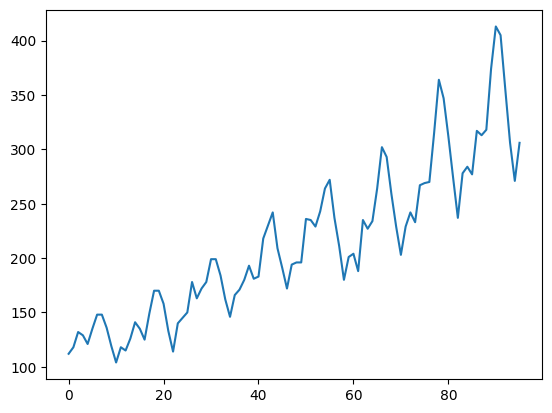

In [17]:
data.Passengers.plot()

In [18]:
data.shape

(96, 20)

In [19]:
data.dtypes

index                      int64
Date              datetime64[ns]
Passengers                 int64
month                     object
year                      object
t                          int64
t_squared                  int64
Jan                        uint8
Feb                        uint8
Mar                        uint8
Apr                        uint8
May                        uint8
Jun                        uint8
Jul                        uint8
Aug                        uint8
Sep                        uint8
Oct                        uint8
Nov                        uint8
Dec                        uint8
log_passengers           float64
dtype: object

<Axes: xlabel='year', ylabel='Passengers'>

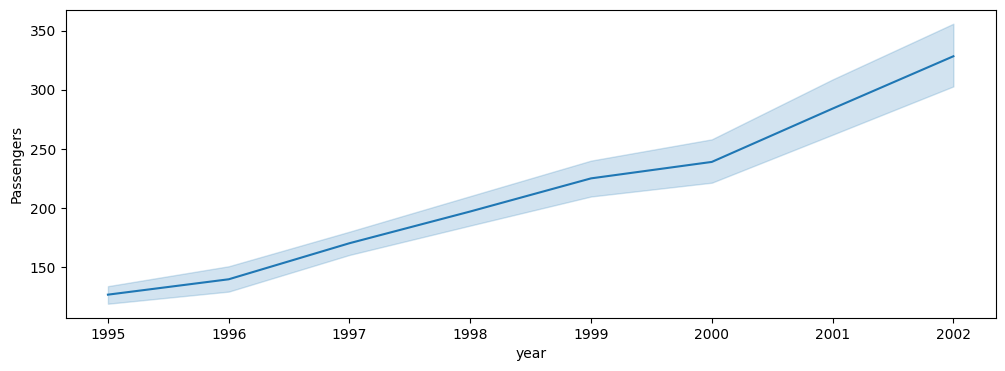

In [20]:
plt.figure(figsize=(12,4))
sns.lineplot(x='year',y='Passengers',data=data)

# **Data Splitting**

In [21]:
train = data.iloc[:-25]
test = data.iloc[-25:]

In [22]:
train

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,0,1995-01-01,112,Jan,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1,1995-02-01,118,Feb,1995,2,4,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,2,1995-03-01,132,Mar,1995,3,9,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,3,1995-04-01,129,Apr,1995,4,16,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,4,1995-05-01,121,May,1995,5,25,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,2000-07-01,302,Jul,2000,67,4489,0,0,0,0,0,0,1,0,0,0,0,0,5.710427
67,67,2000-08-01,293,Aug,2000,68,4624,0,0,0,0,0,0,0,1,0,0,0,0,5.680173
68,68,2000-09-01,259,Sep,2000,69,4761,0,0,0,0,0,0,0,0,1,0,0,0,5.556828
69,69,2000-10-01,229,Oct,2000,70,4900,0,0,0,0,0,0,0,0,0,1,0,0,5.433722


In [23]:
test

,index,Date,Passengers,month,year,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
71,71,2000-12-01,229,Dec,2000,72,5184,0,0,0,0,0,0,0,0,0,0,0,1,5.433722
72,72,2001-01-01,242,Jan,2001,73,5329,1,0,0,0,0,0,0,0,0,0,0,0,5.488938
73,73,2001-02-01,233,Feb,2001,74,5476,0,1,0,0,0,0,0,0,0,0,0,0,5.451038
74,74,2001-03-01,267,Mar,2001,75,5625,0,0,1,0,0,0,0,0,0,0,0,0,5.587249
75,75,2001-04-01,269,Apr,2001,76,5776,0,0,0,1,0,0,0,0,0,0,0,0,5.594711
76,76,2001-05-01,270,May,2001,77,5929,0,0,0,0,1,0,0,0,0,0,0,0,5.598422
77,77,2001-06-01,315,Jun,2001,78,6084,0,0,0,0,0,1,0,0,0,0,0,0,5.752573
78,78,2001-07-01,364,Jul,2001,79,6241,0,0,0,0,0,0,1,0,0,0,0,0,5.897154
79,79,2001-08-01,347,Aug,2001,80,6400,0,0,0,0,0,0,0,1,0,0,0,0,5.849325
80,80,2001-09-01,312,Sep,2001,81,6561,0,0,0,0,0,0,0,0,1,0,0,0,5.743003


In [24]:
from sklearn.metrics import mean_squared_error

# **Linear Model**

In [25]:
import statsmodels.formula.api as smf

In [26]:
linear_model = smf.ols('Passengers~t',data=train).fit() #Passengers - target col, t - independent variable
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'],pred_linear)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_linear # RMSE should be minimum. try all models. Whichever model will give you min, RMSE that will be our final model

49.93200850689322

# **Exponential Model**

In [27]:
exp = smf.ols('log_passengers~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_exp = np.sqrt(mean_squared_error(test['log_passengers'],pred_exp)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_exp

0.1337027713034707

# **Quadratic Model**

In [28]:
quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad


48.01634803566434

# **Additive Seasonality Model - Pass from Jan to Nov**

In [29]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

126.22162484209177

# **Additive Seasonality Quadratic Model**

In [30]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_quad))
rmse_add_sea_quad

33.1829513258569

# **Multiplicative Seasonality**

In [31]:
mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['log_passengers'],pred_mul_sea))
rmse_mul_sea

0.5415410231094869

# **Compare the results**

In [32]:
data = {"MODEL":pd.Series(['Linear','Exponential','Quadratic','Additive Seas','Additive Seas Quad','Multiplicative Seas']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
1,Exponential,0.133703
5,Multiplicative Seas,0.541541
4,Additive Seas Quad,33.182951
2,Quadratic,48.016348
0,Linear,49.932009
3,Additive Seas,126.221625


# *We Found Exponential Model is the best model*